In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import string
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
# test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

In [3]:
# baseLoc = '/kaggle/input/nlp-getting-started/'
# train_data = pd.read_csv(baseLoc + 'train.csv')
# train_data.shape

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [8]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [9]:
train.shape

(7613, 5)

In [10]:
train.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [11]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [12]:
target_value_counts = train['target'].value_counts()
target_value_counts

0    4342
1    3271
Name: target, dtype: int64

There are 4342 non-disasterous tweets and there are 3271 disasterous tweets

In [13]:
non_disasterous = train[train['target'] == 0]
non_disasterous

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0
20,31,NaN,NaN,this is ridiculous....,0
21,32,NaN,NaN,London is cool ;),0
22,33,NaN,NaN,Love skiing,0
23,34,NaN,NaN,What a wonderful day!,0
24,36,NaN,NaN,LOOOOOOL,0


In [14]:
disasterous = train[train['target'] == 1]
disasterous

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


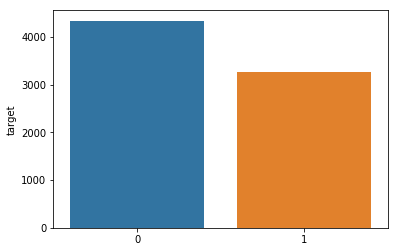

In [15]:
sns.barplot(x = target_value_counts.index, y = target_value_counts)

In [16]:
keywords_value_counts = train['keyword'].value_counts()
keywords_value_counts[:30]

fatalities     45
armageddon     42
deluge         42
harm           41
damage         41
sinking        41
body%20bags    41
siren          40
collided       40
evacuate       40
fear           40
windstorm      40
twister        40
outbreak       40
sunk           39
famine         39
sinkhole       39
whirlwind      39
derailment     39
collision      39
explosion      39
flames         39
weapon         39
weapons        39
hellfire       39
wreckage       39
wrecked        39
earthquake     39
blaze          38
ambulance      38
Name: keyword, dtype: int64

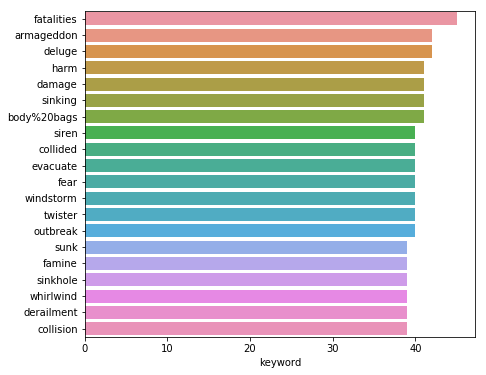

In [17]:
figure = plt.figure(figsize=(7,6))
sns.barplot(x = keywords_value_counts[:20], y = keywords_value_counts.index[:20])

In [18]:
location_value_counts = train['location'].value_counts()
location_value_counts[:20]

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
California          17
Everywhere          15
California, USA     15
New York, NY        15
Florida             14
Name: location, dtype: int64

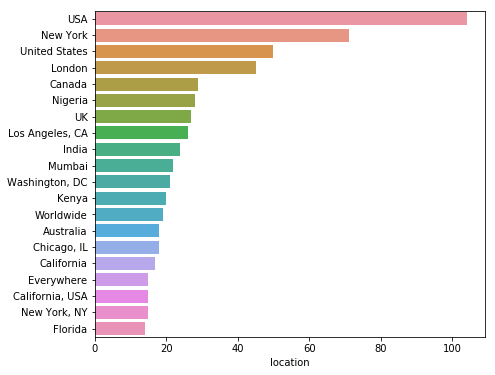

In [19]:
figure = plt.figure(figsize=(7,6))
sns.barplot(x = location_value_counts[:20], y = location_value_counts.index[:20])

# Data Preprocessing

* Removing the punctuation from the dataset
* Replacing the punctuation with blank spaces

In [20]:
import re

In [21]:
# Removing punctuation, html tags, symbols, numbers, etc

def remove_noise(text):
    # Dealing with Punctuation
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [22]:
train['text'] = train['text'].apply(lambda x:remove_noise(x))
test['text'] = test['text'].apply(lambda x:remove_noise(x))

In [23]:
# Converting the upper case to lower case
train['text'] = train['text'].apply(lambda x : x.lower())
test['text'] = test['text'].apply(lambda x : x.lower())

In [24]:
train['text'][2000]

' the saw is fast af and does great damage i upgraded it a shitton and used it exclusively for a whole playthrough'

In [25]:
test['text'][1000]

'a demolished palestinian village comes back to life  via wagingnv '

* Removing stopwords

In [26]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1


* removing stopwords

In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop = stopwords.words('english')

In [28]:
def remove_stopwords(text):
    text = [item for item in text.split() if item not in stop]
    return ' '.join(text)

train['cleaned_text'] = train['text'].apply(remove_stopwords)
test['cleaned_text'] = test['text'].apply(remove_stopwords)

In [29]:
train.head()

,id,keyword,location,text,target,cleaned_text
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,forest fire near la ronge sask canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,residents asked shelter place notified officer...
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1,people receive wildfires evacuation orders cal...
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,got sent photo ruby alaska smoke wildfires pou...


In [30]:
test.head()

,id,keyword,location,text,cleaned_text
0,0,NaN,NaN,just happened a terrible car crash,happened terrible car crash
1,2,NaN,NaN,heard about earthquake is different cities sta...,heard earthquake different cities stay safe ev...
2,3,NaN,NaN,there is a forest fire at spot pond geese are ...,forest fire spot pond geese fleeing across str...
3,9,NaN,NaN,apocalypse lighting spokane wildfires,apocalypse lighting spokane wildfires
4,11,NaN,NaN,typhoon soudelor kills in china and taiwan,typhoon soudelor kills china taiwan


In [31]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]
    return ' '.join(text)
    
train['stemed_text'] = train['cleaned_text'].apply(stemming)
test['stemed_text'] = test['cleaned_text'].apply(stemming)

train.head()

,id,keyword,location,text,target,cleaned_text,stemed_text
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,deeds reason earthquake may allah forgive us,deed reason earthquak may allah forgiv us
1,4,NaN,NaN,forest fire near la ronge sask canada,1,forest fire near la ronge sask canada,forest fire near la rong sask canada
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,residents asked shelter place notified officer...,resid ask shelter place notifi offic evacu she...
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1,people receive wildfires evacuation orders cal...,peopl receiv wildfir evacu order california
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,got sent photo ruby alaska smoke wildfires pou...,got sent photo rubi alaska smoke wildfir pour ...


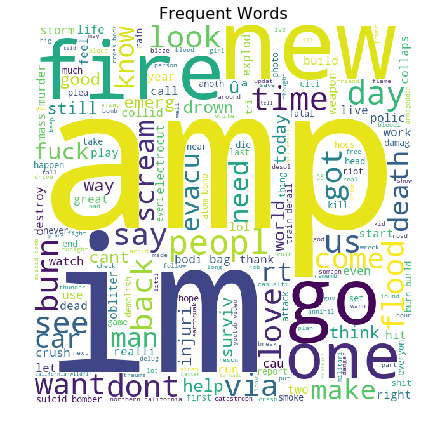

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
fig, (ax1) = plt.subplots(1, figsize=[7, 7])
wordcloud = WordCloud( background_color='white',
                        width=600,
                        height=600).generate(" ".join(train['stemed_text']))
ax1.imshow(wordcloud)
ax1.axis('off')
ax1.set_title('Frequent Words',fontsize=16);

### Using CountVectorizer to convert tweets into vectors

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(analyzer='word', binary=True)
count_vectorizer.fit(train['stemed_text'])

train_vectors = count_vectorizer.fit_transform(train['stemed_text'])
test_vectors = count_vectorizer.transform(test['stemed_text'])

print(train_vectors[0].todense())

[[0 0 0 ... 0 0 0]]


In [35]:
y = train['target']

In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Applying MultinomialMB

In [37]:
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
import numpy as np 
import itertools

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_vectors, y , test_size=0.30, random_state=42)

In [39]:
from sklearn.naive_bayes import MultinomialNB

multi_nb = MultinomialNB(alpha=1.6)

multi_nb.fit(x_train, y_train)

MultinomialNB(alpha=1.6, class_prior=None, fit_prior=True)

In [40]:
pred = multi_nb.predict(x_test)

In [41]:
acc_score = accuracy_score(y_test, pred)
("The accuracy for MultinomialNB is : ",acc_score)

('The accuracy for MultinomialNB is : ', 0.8003502626970228)

Confusion matrix, without normalization


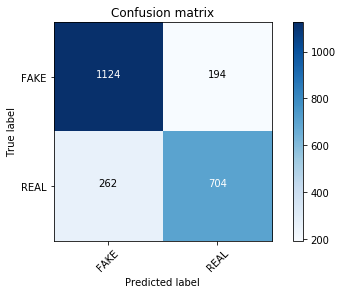

In [42]:
conf_matrix = confusion_matrix(y_test, pred)
plot_confusion_matrix(conf_matrix, classes=['FAKE', 'REAL'])

In [43]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(multi_nb, train_vectors, y, cv=3, scoring='f1', )
score

array([0.66161855, 0.64516129, 0.72248597])

## Hyperparameter tuning for MultinomialNB

In [44]:
multinb_classifier = MultinomialNB(alpha=0.1)

In [45]:
previous_score = 0

# We are taking values from 0 to 1 with an increament of 0.1 

for alpha in np.arange(0,2,0.1):
    sub_classifier = MultinomialNB(alpha=alpha)
    sub_classifier.fit(x_train, y_train)
    y_pred = sub_classifier.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    
    if score> previous_score:
        classifier = sub_classifier
        print("Alpha is : {} & Accuracy is : {}".format(alpha, score))

Alpha is : 0.0 & Accuracy is : 0.7530647985989493
Alpha is : 0.1 & Accuracy is : 0.7784588441330998
Alpha is : 0.2 & Accuracy is : 0.7850262697022767
Alpha is : 0.30000000000000004 & Accuracy is : 0.7854640980735552
Alpha is : 0.4 & Accuracy is : 0.7880910683012259
Alpha is : 0.5 & Accuracy is : 0.792031523642732
Alpha is : 0.6000000000000001 & Accuracy is : 0.792031523642732
Alpha is : 0.7000000000000001 & Accuracy is : 0.792907180385289
Alpha is : 0.8 & Accuracy is : 0.7950963222416813
Alpha is : 0.9 & Accuracy is : 0.7950963222416813
Alpha is : 1.0 & Accuracy is : 0.7950963222416813
Alpha is : 1.1 & Accuracy is : 0.7959719789842382
Alpha is : 1.2000000000000002 & Accuracy is : 0.7959719789842382
Alpha is : 1.3 & Accuracy is : 0.7968476357267951
Alpha is : 1.4000000000000001 & Accuracy is : 0.7994746059544658
Alpha is : 1.5 & Accuracy is : 0.7990367775831874
Alpha is : 1.6 & Accuracy is : 0.8003502626970228
Alpha is : 1.7000000000000002 & Accuracy is : 0.8016637478108581
Alpha is : 1

/home/akhil/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


## Applying Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

log_regression.fit(x_train, y_train)

log_pred = log_regression.predict(x_test)

log_acc_score = accuracy_score(y_test, log_pred)
print("The accuracy score for logistic regression is : ",log_acc_score)

The accuracy score for logistic regression is :  0.797723292469352


/home/akhil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix, without normalization


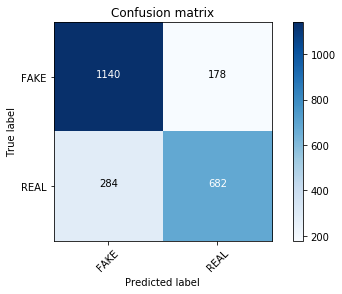

In [47]:
conf_matrix = confusion_matrix(y_test, log_pred)
plot_confusion_matrix(conf_matrix, classes=['FAKE', 'REAL'])

## Applying decision tree algorithm

The accuracy score for Decision Tree is : 0.7421190893169878
Confusion matrix, without normalization


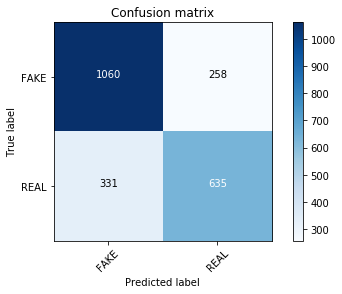

In [48]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(x_train, y_train)
dtree_predict = dtree.predict(x_test)

dtree_score = accuracy_score(y_test, dtree_predict)
print("The accuracy score for Decision Tree is : {}".format(dtree_score))

conf_matrix = confusion_matrix(y_test, dtree_predict)
plot_confusion_matrix(conf_matrix, classes=['FAKE', 'REAL'])

### Applying Random Forest Classifier

/home/akhil/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy score for Decision Tree is : 0.7771453590192644
Confusion matrix, without normalization


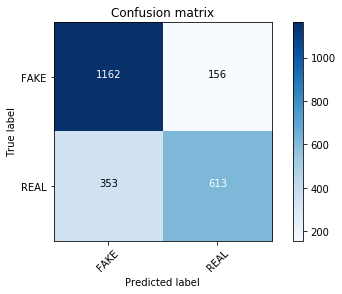

In [49]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

random_forest_predict = random_forest.predict(x_test)

random_forest_score = accuracy_score(y_test, random_forest_predict)
print("The accuracy score for Decision Tree is : {}".format(random_forest_score))

conf_matrix = confusion_matrix(y_test, random_forest_predict)
plot_confusion_matrix(conf_matrix, classes=['FAKE', 'REAL'])

## Applying Xgboot Algorithm

/home/akhil/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/akhil/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


The accuracy score for XGboost is : 0.7832749562171629
Confusion matrix, without normalization


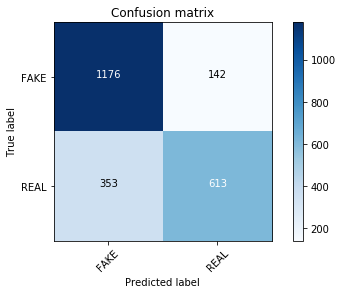

In [50]:
import xgboost as xgb

xgboost = xgb.XGBClassifier()

xgboost.fit(x_train, y_train)
xgboost_pred = xgboost.predict(x_test)

xgboost_score = accuracy_score(y_test, xgboost_pred)
print("The accuracy score for XGboost is : {}".format(xgboost_score))

conf_matrix = confusion_matrix(y_test, xgboost_pred)
plot_confusion_matrix(conf_matrix, classes=['FAKE', 'REAL'])

### Algorithm K-NN Classifier

The accuracy score for XGboost is : 0.8022142991180334
Confusion matrix, without normalization


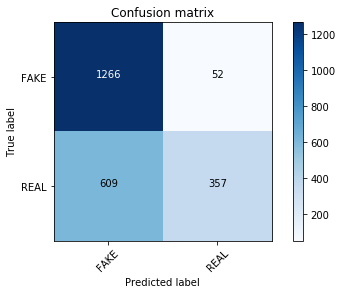

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors = 3)
knn_clf.fit(x_train, y_train)
y_pred_knn = knn_clf.predict(x_test)
acc_knn = knn_clf.score(x_train, y_train)

print("The accuracy score for XGboost is : {}".format(acc_knn))

conf_matrix = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(conf_matrix, classes=['FAKE', 'REAL'])

### Applying Support Vector Machine (SVM)

/home/akhil/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy score for SVM is : 0.5674610621129668
Confusion matrix, without normalization


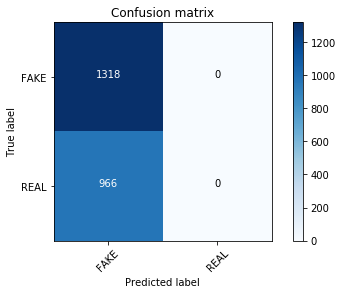

In [52]:
from sklearn.svm import SVC, LinearSVC

svm_clf = SVC()
svm_clf.fit(x_train, y_train)
y_pred_svc = svm_clf.predict(x_test)
acc_svc = svm_clf.score(x_train, y_train)

print("The accuracy score for SVM is : {}".format(acc_svc))

conf_matrix = confusion_matrix(y_test, y_pred_svc)
plot_confusion_matrix(conf_matrix, classes=['FAKE', 'REAL'])

### Applying Linear SVM Algorithm

The accuracy score for SVM is : 0.9874272846687934
Confusion matrix, without normalization


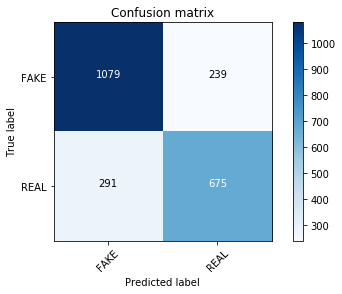

In [53]:
linear_svc_clf = LinearSVC()
linear_svc_clf.fit(x_train, y_train)
y_pred_linear_svc = linear_svc_clf.predict(x_test)
acc_linear_svc =linear_svc_clf.score(x_train, y_train)

print("The accuracy score for SVM is : {}".format(acc_linear_svc))

conf_matrix = confusion_matrix(y_test, y_pred_linear_svc)
plot_confusion_matrix(conf_matrix, classes=['FAKE', 'REAL'])

### Applying Stochastic Gradient Descent (SGD)

/home/akhil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


The accuracy score for SVM is : 0.9607806342653405
Confusion matrix, without normalization


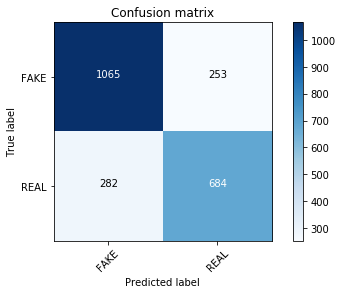

In [54]:
from sklearn.linear_model import SGDClassifier

sgdc_clf = SGDClassifier(max_iter=5, tol=None)
sgdc_clf.fit(x_train, y_train)
y_pred_sgd = sgdc_clf.predict(x_test)
acc_sgd = sgdc_clf.score(x_train, y_train)

print("The accuracy score for SVM is : {}".format(acc_sgd))

conf_matrix = confusion_matrix(y_test, y_pred_sgd)
plot_confusion_matrix(conf_matrix, classes=['FAKE', 'REAL'])

#### Comparing the models based on accuracy

* Let's compare the accuracy score of all the classifier models used above.

In [55]:
models = pd.DataFrame({
    'Model': ['MultinomialNB', 'Decision Tree', 'Random Forest', 'XgBoost', 'K-NN Classifier', 'SVM', 'linear SVM', 'SGD'],
    
    'Score': [acc_score, dtree_score, random_forest_score, xgboost_score, acc_knn, acc_svc, acc_svc, acc_sgd]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
7,SGD,0.960781
4,K-NN Classifier,0.802214
0,MultinomialNB,0.800350
3,XgBoost,0.783275
2,Random Forest,0.777145
1,Decision Tree,0.742119
5,SVM,0.567461
6,linear SVM,0.567461


#### Submission file to Kaggle

In [59]:
# sample_submission = pd.read_csv(baseLoc + "sample_submission.csv")
# # Predicting model with the test data that was vectorized (test_vectors)
# sample_submission['target'] = multi_nb.predict(test_vectors)

In [60]:
# sample_submission.to_csv("submission3.csv", index=False)


In [61]:
# sample_submission.head(20)